# Подключаем Googledrive к GoogleColab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Необходимые библиотеки


In [0]:
import sklearn.tree as tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

# Чтение данных

In [0]:

#file_table="/content/drive/My Drive/melanch/data _Ulitca 17.04.xlsx"
file_table="/content/drive/My Drive/Диссертация/data/data _Ulitca 17.04.xlsx"

#Читаем входные данные, которые сохранены в Лист 1

NList=1
DataListID=(NList-1)*2

df=pd.read_excel(file_table,sheet_name=DataListID)

# Читаем имена атрибутов, которые сохранены в Лист_1
AttrListID=1
dft=pd.read_excel(file_table,sheet_name=AttrListID)



# Смотрим месторасположение улицы на карте


In [11]:
print("Name: ",df.iloc[0]["Name"])
print("Map: ",df.iloc[0].GPS)

Name:  ул. Промышленная
Map:  "https://yandex.ru/maps/2/saint-petersburg/?ll=30.273518%2C59.899136&mode=usermaps&source=constructorLink&um=constructor%3A536dd7a9b4f7fb9a8a1e80fccbac7dd471fdee9fc4e273d30f1a731f20a8b4ac&z=16"


# Использование всех таблиц

In [0]:
df_from_each_file=(pd.read_excel(file_table,sheet_name=i) for i in range(0,12,2))
dfvec=pd.concat(df_from_each_file, ignore_index=True).fillna(0,downcast='infer')
df=dfvec


In [13]:
# Нам нужно отформатировать таблицу атрибутов
dft

,Name,Reference
0,остановка общественного транспорта,Attr1
1,музей,Attr2
2,"Торговый центр, метро и др.",Attr3
3,зеленая зона (сад),Attr4
4,"образовательное учреждение (Д/САД, ШКОЛА, УНИВЕР)",Attr5
5,жилое помещение,Attr6
6,жилое помещение с размещением социально-значим...,Attr7
7,бизнес-центр,Attr8
8,"бизнес-центр, офисные помещения, магазины, каф...",Attr9
9,Супермаркет,Attr10


# Подготовка данных

In [0]:
# Меняем формат таблиц атрибутов, чтобы попроще добраться до названия атрибутов
# Например: dft90.Attr1
dft90=dft.T.copy()
dft90.columns=dft["Reference"]
dft90=dft90.drop(index="Reference")

attr_cols = [c for c in df if c.startswith('Attr')]
target_names=dft90[attr_cols].iloc[0].values
feature_names=df["PC"].values
# Разделяем данные на признаки(feature) и на цели(target)
# имена признаков, feature 
X=df[attr_cols]
# выбор колонки для классификации, target
Y=df["PC"]


# Проверка данных

In [17]:
dft90

Reference,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20
Name,остановка общественного транспорта,музей,"Торговый центр, метро и др.",зеленая зона (сад),"образовательное учреждение (Д/САД, ШКОЛА, УНИВЕР)",жилое помещение,жилое помещение с размещением социально-значим...,бизнес-центр,"бизнес-центр, офисные помещения, магазины, каф...",Супермаркет,торговый центр,продуктовый (продовольственный) магазин,производственная зона,зоомагазин,"Собор, Церковь",Гостиница,музей,автосалон,"Комплекс, где расположены банк, почта, кафе, к...","столовая, кафе"


In [18]:
df

,Name,GPS,SecN,Attr6,Attr8,Attr13,Attr12,Attr4,Attr5,Attr20,Attr14,Attr11,PC,Attr15,Attr7,Attr1,Attr9,Attr18,Attr19,Attr16,Attr17,Attr2,Attr3
0,ул. Промышленная,"""https://yandex.ru/maps/2/saint-petersburg/?ll...",0,0,0,0,0,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,0
1,ул. Промышленная,0,1,0,0,0,0,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,0
2,ул. Промышленная,0,2,1,1,1,1,1,0,0,0,0,YES,0,0,0,0,0,0,0,0,0,0
3,ул. Промышленная,0,3,0,0,0,0,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,0
4,ул. Промышленная,0,4,1,0,1,0,1,1,1,0,0,YES,0,0,0,0,0,0,0,0,0,0
5,ул. Промышленная,0,5,1,0,1,1,0,1,1,1,0,YES,0,0,0,0,0,0,0,0,0,0
6,ул. Промышленная,0,6,0,0,0,0,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,0
7,ул. Промышленная,0,7,0,0,0,0,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,0
8,ул. Промышленная,0,8,0,0,0,0,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,0
9,ул. Промышленная,0,9,1,0,0,0,0,0,0,0,1,YES,0,0,0,0,0,0,0,0,0,0


# Построение дерева решений

In [0]:
# Построение классификационного дерева на основе X и Y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
attr_cols.append("PC")

# Визуализация дерева решений

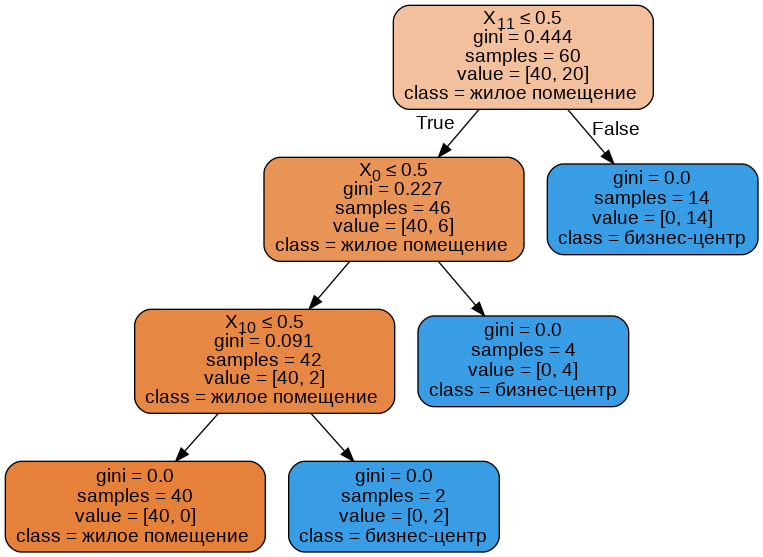

In [20]:
dot_data = StringIO()
tree.export_graphviz(clf,
 out_file=dot_data,
 class_names=target_names, # the target names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Тестирование дерева решений

In [25]:
# Тестируем дерево на основе данных, которые уже использовались при построении дерева
# Тестовые входные данные те же самые, что и использовались для тренировки дерева
# Чтобы показать, что использование библиотек и тренировка дерева прошли успешно
def TestSec2PC(SecN):
    PC=clf.predict([X.iloc[SecN].values])
    print("Мы тестируем Sec = "+str(SecN)+" и получаем результат: нам нужен пешеходный переход на "+df['Name'].iloc[SecN]+": "+str(PC), " До этого было "+df.iloc[SecN].PC)


for SecN in range(0,10):
  TestSec2PC(SecN)


Мы тестируем Sec = 0 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 1 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 2 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['YES']  До этого было YES
Мы тестируем Sec = 3 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 4 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['YES']  До этого было YES
Мы тестируем Sec = 5 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['YES']  До этого было YES
Мы тестируем Sec = 6 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 7 и получаем результат: нам нужен пешеходный переход на ул. Промышленная: ['NO']  До этого было NO
Мы тестируем Sec = 8 и получаем результат: нам нуж

In [28]:
# Читаем новые входные данные для тестирования, которые не имеют информации о переходах
file_table="/content/drive/My Drive/Диссертация/data/data _Ulitca 17.04.xlsx"
#file_table="/content/drive/My Drive/melanch/data _Ulitca 17.04.xlsx"
#Читаем входные данные, которые сохранены в Лист 7
NList=7
DataListID=(NList-1)*2

dfTest=pd.read_excel(file_table,sheet_name=DataListID)

print("Name: ",dfTest.iloc[0]["Name"])
print("Map: ",dfTest.iloc[0].GPS)

Name:  пер. Челиева
Map:  "https://yandex.ru/maps/?um=constructor%3A62895f23c0fe9a1d96668421b95cb270c42b7f9cb1ae27644feea0a0fe467763&source=constructorLink"


In [34]:
dfTest

,Name,GPS,SecN,Attr15,Attr13,Attr12,Attr8,Attr6,Attr5,Attr7,PC
0,пер. Челиева,"""https://yandex.ru/maps/?um=constructor%3A6289...",0,1,1,0,0,0,0,0,NO
1,пер. Челиева,NaN,1,0,1,0,0,0,0,0,NO
2,пер. Челиева,NaN,2,0,1,0,0,0,0,0,NO
3,пер. Челиева,NaN,3,0,1,0,0,0,0,0,NO
4,пер. Челиева,NaN,4,0,1,1,1,0,0,0,NO
5,пер. Челиева,NaN,5,0,1,1,1,0,0,0,NO
6,пер. Челиева,NaN,6,0,1,1,1,0,0,0,NO
7,пер. Челиева,NaN,7,0,1,1,0,1,1,1,NO
8,пер. Челиева,NaN,8,0,1,1,0,0,1,1,NO
9,пер. Челиева,NaN,9,0,1,1,0,0,0,1,NO


In [0]:
# Готовим входные данные для тестирования
# Так как наше дерево было натренировано на 19 входных атрибутов, нам необходимо подготовить входную таблицу с тем же количеством атрибутов
attr_cols_test = [c for c in dfTest if c.startswith('Attr')]
dfTestX=X.copy(deep=True)

dfTestX.drop(dfTestX.index, inplace=True)
dfTestX[attr_cols_test]=dfTest[attr_cols_test]
dfTestX.fillna(0,inplace=True,downcast='infer')# Неизвестным значениям задаем 0, так как они не влияют на результат решения

In [35]:
# Тестируем дерево принятия решений на входные тестовые данные 

for SecN in range(0,10):
    PC=clf.predict([dfTestX.iloc[SecN].values])
    print("Мы тестируем Sec = "+str(SecN)+" и получаем результат: нам нужен пешеходный переход на "+dfTest['Name'].iloc[SecN]+": "+str(PC), " До этого было "+dfTest.iloc[SecN].PC)


Мы тестируем Sec = 0 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 1 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 2 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 3 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 4 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 5 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 6 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['NO']  До этого было NO
Мы тестируем Sec = 7 и получаем результат: нам нужен пешеходный переход на пер. Челиева: ['YES']  До этого было NO
Мы тестируем Sec = 8 и получаем результат: нам нужен пешеходный переход на пер. Челиева

# Будущая работа
Для будущей работы нам нужен большой объём входных данных на сектора улиц для улучшения результата

* Model1 SPiterDT-1 - (X,Y,clf) - исторический центр
* Model2 SPiterDT-2 - (X2,Y2,clf2) - спальные районы
* ... и т.д.